In [53]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df= pd.read_csv('/Users/jowaynejosephs/Desktop/movies_analysis/movies_clean.csv')
pd.set_option('display.max_rows', None)


array([175000000, 175000000, 175000000, ...,    212285,    203134,
          191862])

### Exploratory Data Analysis

In [8]:
df.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Profit/Loss,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,-868671,loss,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000,88246220,264246220,89246220,profit,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,-35049292,loss,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,-23283185,loss,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,1134866322,profit,Universal,PG-13,Action


In [9]:
df.loc[3364,'domestic_gross']

191862

In [10]:
df.tail()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Profit/Loss,distributor,mpaa_rating,genre
3360,3397,10/28/2011,Like Crazy,250000,3395391,3728400,3478400,profit,Paramount Pictures,PG-13,Drama
3361,3398,7/14/2000,Chuck&Buck,250000,1055671,1157672,907672,profit,Artisan,R,Drama
3362,3399,3/28/1997,Love and Other Catastrophes,250000,212285,743216,493216,profit,Fox Searchlight,R,Comedy
3363,3400,8/28/1998,I Married a Strange Person,250000,203134,203134,-46866,loss,Lionsgate,NaN,Comedy
3364,3401,7/22/2005,November,250000,191862,191862,-58138,loss,Sony Pictures Classics,R,Drama


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3365 non-null   int64 
 1   release_date       3365 non-null   object
 2   movie              3365 non-null   object
 3   production_budget  3365 non-null   int64 
 4   domestic_gross     3365 non-null   int64 
 5   worldwide_gross    3365 non-null   int64 
 6   profit             3365 non-null   int64 
 7   Profit/Loss        3365 non-null   object
 8   distributor        3322 non-null   object
 9   mpaa_rating        3233 non-null   object
 10  genre              3365 non-null   object
dtypes: int64(5), object(6)
memory usage: 289.3+ KB


In [12]:
df.describe()

,Unnamed: 0,production_budget,domestic_gross,worldwide_gross,profit
count,3365.000000,3.365000e+03,3.365000e+03,3.365000e+03,3.365000e+03
mean,1689.485884,3.351283e+07,4.590773e+07,9.512200e+07,6.160917e+07
std,977.740641,3.487192e+07,5.895062e+07,1.413317e+08,1.213050e+08
min,1.000000,2.500000e+05,0.000000e+00,4.230000e+02,-1.104502e+08
25%,844.000000,9.600000e+06,6.600000e+06,1.111577e+07,-2.178990e+06
50%,1685.000000,2.000000e+07,2.588500e+07,4.116603e+07,1.692159e+07
75%,2532.000000,4.500000e+07,6.078627e+07,1.195000e+08,7.590000e+07
max,3401.000000,1.750000e+08,4.745447e+08,1.304866e+09,1.134866e+09


In [13]:
df = df.dropna() #dopping null values

#we dropped 163 rows

In [14]:
df.columns

Index(['Unnamed: 0', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'profit', 'Profit/Loss',
       'distributor', 'mpaa_rating', 'genre'],
      dtype='object')

In [15]:
df['Profit/Loss'].value_counts()

profit    2243
loss       959
Name: Profit/Loss, dtype: int64

In [16]:
df['distributor'].value_counts().head()  #this should be accounted for in regression

Warner Bros.          362
Sony Pictures         333
Universal             283
20th Century Fox      272
Paramount Pictures    255
Name: distributor, dtype: int64

In [17]:
df['mpaa_rating'].value_counts()

R        1476
PG-13    1082
PG        560
G          84
Name: mpaa_rating, dtype: int64

In [18]:
df['genre'].value_counts()

Drama        1172
Comedy        769
Action        532
Adventure     465
Horror        264
Name: genre, dtype: int64

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])
#converted release date column from object to date, found the min and mx years of the data

## Summary Statistics

In [20]:
#lowest budget is 25000 (find movies) identify movie also
min_prod_budget=df['production_budget'].min()
min_prod_budget

#highest prod budget identify movie also
max_prod_budget=df['production_budget'].max()
max_prod_budget

print (f"The  min budget is { min_prod_budget } and the max budget is {max_prod_budget}")

The  min budget is 250000 and the max budget is 175000000


In [21]:
mean_prod_budget = round(df['production_budget'].mean())
print (f"The production budget mean is {mean_prod_budget}")

The production budget mean is 34774026


In [22]:
median_prod_budget = round(df['production_budget'].median())
print (f"The production budget median is {median_prod_budget}")

The production budget median is 22000000


In [23]:
#add variance here

# Calculate the variance of the 'numbers' column
prod_budget_variance = round(df['production_budget'].var())
print(prod_budget_variance)

# Calculate the standard deviation of the 'numbers' column
prod_budget_std_dev = round(df['production_budget'].std())
print(prod_budget_std_dev)

1240772954519998
35224607


In [24]:
#What is the mode of the profit/loss ?
profit_mode = df['Profit/Loss'].value_counts()
profit_mode


profit    2243
loss       959
Name: Profit/Loss, dtype: int64

In [25]:
missing_value = df.isna().sum()['production_budget']
print(f'Number of Missing values in production_budget is: {missing_value}')
#Number of values missing is 0

Number of Missing values in production_budget is: 0


In [26]:
# df=df.sort_values(by='production_budget', ascending=True, na_position='first')
# df.head() #table is now sorted by production budget

In [27]:
df.columns

Index(['Unnamed: 0', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'profit', 'Profit/Loss',
       'distributor', 'mpaa_rating', 'genre'],
      dtype='object')

### Calculations

In [29]:
#Finding the data for the minimum and maximum movies by release_date
df.agg(['min','max'])


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,Profit/Loss,distributor,mpaa_rating,genre
min,1,1936-02-05,10 Days in a Madhouse,250000,0,423,-110450242,loss,20th Century Fox,G,Action
max,3401,2018-10-12,長江七號 (CJ7),175000000,474544677,1304866322,1134866322,profit,Zeitgeist,R,Horror


In [30]:
#determine the most successful distributor based on profit percentage
df['percentage_profit']=(df['profit']/df['production_budget']*100)-100
df.columns
df=df.loc[:,['Unnamed: 0','release_date','movie','domestic_gross','worldwide_gross',
           'production_budget','profit','percentage_profit','Profit/Loss','distributor','mpaa_rating',
           'genre']]
df.head()

,Unnamed: 0,release_date,movie,domestic_gross,worldwide_gross,production_budget,profit,percentage_profit,Profit/Loss,distributor,mpaa_rating,genre
0,1,2007-06-22,Evan Almighty,100289690,174131329,175000000,-868671,-100.496383,loss,Universal,PG,Comedy
1,2,1995-07-28,Waterworld,88246220,264246220,175000000,89246220,-49.002160,profit,Universal,PG-13,Action
2,3,2017-05-12,King Arthur: Legend of the Sword,39175066,139950708,175000000,-35049292,-120.028167,loss,Warner Bros.,PG-13,Adventure
3,4,2013-12-25,47 Ronin,38362475,151716815,175000000,-23283185,-113.304677,loss,Universal,PG-13,Action
4,5,2018-06-22,Jurassic World: Fallen Kingdom,416769345,1304866322,170000000,1134866322,567.568425,profit,Universal,PG-13,Action


In [31]:
#determine the most successful genre based on profit percentage
profit_by_genre=df.groupby(by='genre')['percentage_profit'].sum().reset_index()
profit_by_genre


,genre,percentage_profit
0,Action,64774.073607
1,Adventure,79997.599630
2,Comedy,122565.220138
3,Drama,227465.012541
4,Horror,244537.110571


### Visualizations

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [33]:
plt.style.use('_classic_test_patch')

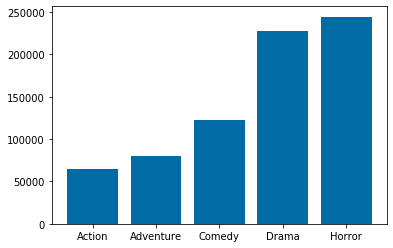

In [34]:
plt.style.use('tableau-colorblind10')
x=profit_by_genre['genre']
y=round(profit_by_genre['percentage_profit'])
#print(x,y)
plt.bar(x, y)
#plt.bar(x, y, color='purple')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='percentage_profit'>

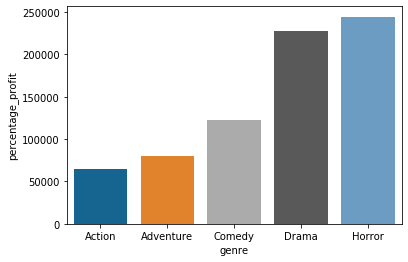

In [35]:
sns.barplot(x, y, data=profit_by_genre)

In [36]:
profit_by_genre.columns

Index(['genre', 'percentage_profit'], dtype='object')

In [37]:
#determine the most successful distributor based on profit percentage
profit_by_distributor=df.groupby(by='distributor')['percentage_profit'].sum().reset_index()
#profit_by_distributor=profit_by_distributor.to_frame()



#top 5 distributors by percentage profit
profit_by_distributor_top_five=profit_by_distributor.sort_values(by=['percentage_profit'],ascending=False).head()

profit_by_distributor_top_five

,distributor,percentage_profit
110,Paramount Pictures,109257.690258
157,Universal,99483.304624
0,20th Century Fox,54444.697273
164,Warner Bros.,53839.349196
10,Artisan,41195.717085


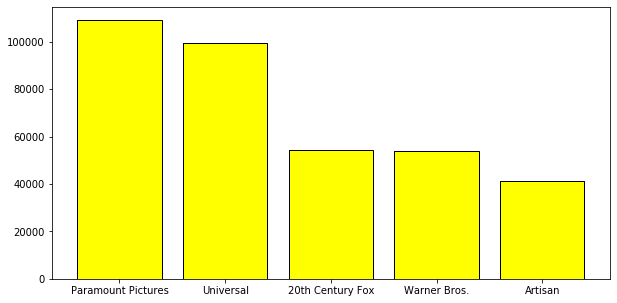

In [38]:
x=profit_by_distributor_top_five['distributor']
y=round(profit_by_distributor_top_five['percentage_profit'])
#print(x,y)
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.bar(x, y, color='yellow',edgecolor='black')
plt.show()
#As we can see below, the most successful distributor is Paramount pictures

In [39]:
#bottom 5 distributors
bottom_five=profit_by_distributor.sort_values(by=['percentage_profit'],ascending=True).head()
bottom_five

,distributor,percentage_profit
8,Anchor Bay Entertai…,-2411.292039
52,Freestyle Releasing,-2089.272435
150,ThinkFilm,-1206.123475
6,Alchemy,-1106.203775
90,Monterey Media,-985.225393


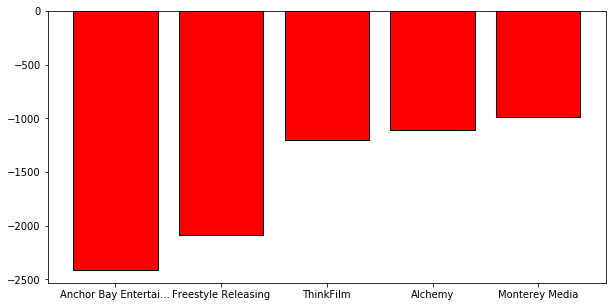

In [40]:
x=bottom_five['distributor']
y=round(bottom_five['percentage_profit'])
#print(x,y)
plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.bar(x, y, color='red',edgecolor='black')
plt.show()
#As we can see below, the least successful distributor is Anchor Bay Entertainment

In [42]:
df_all_rows = pd.concat([profit_by_distributor_top_five,bottom_five ])
df_all_rows.columns

Index(['distributor', 'percentage_profit'], dtype='object')

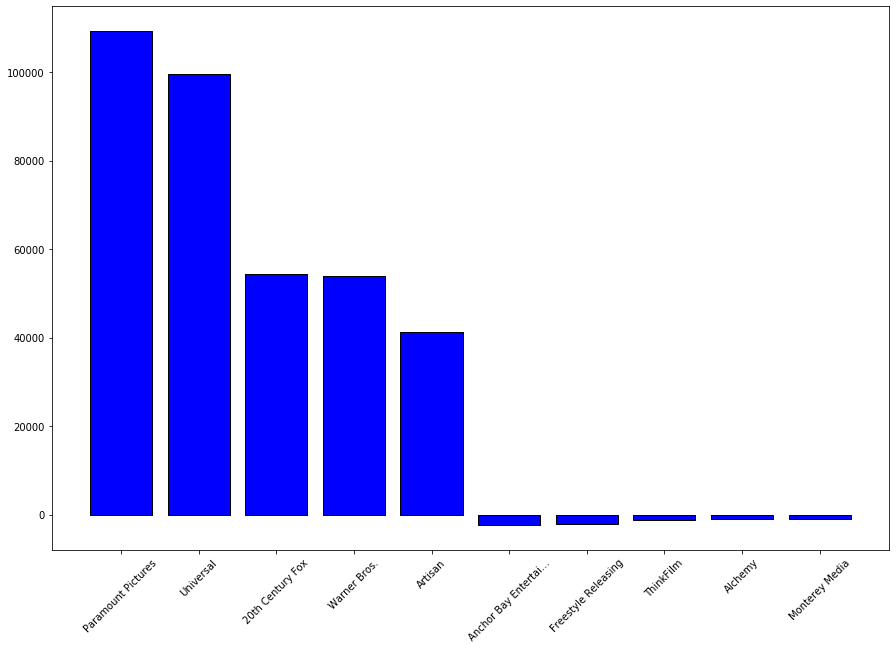

In [43]:
x=df_all_rows['distributor']
y=round(df_all_rows['percentage_profit'])
#print(x,y)
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.bar(x, y, color='blue',edgecolor='black')
plt.gca().xaxis.set_tick_params(rotation=45)
plt.show()
#This combined data set is giving us the most and least successful distributors in the same bar chart.

In [44]:
bottom_five.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 8 to 90
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distributor        5 non-null      object 
 1   percentage_profit  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [45]:
df.head()

,Unnamed: 0,release_date,movie,domestic_gross,worldwide_gross,production_budget,profit,percentage_profit,Profit/Loss,distributor,mpaa_rating,genre
0,1,2007-06-22,Evan Almighty,100289690,174131329,175000000,-868671,-100.496383,loss,Universal,PG,Comedy
1,2,1995-07-28,Waterworld,88246220,264246220,175000000,89246220,-49.002160,profit,Universal,PG-13,Action
2,3,2017-05-12,King Arthur: Legend of the Sword,39175066,139950708,175000000,-35049292,-120.028167,loss,Warner Bros.,PG-13,Adventure
3,4,2013-12-25,47 Ronin,38362475,151716815,175000000,-23283185,-113.304677,loss,Universal,PG-13,Action
4,5,2018-06-22,Jurassic World: Fallen Kingdom,416769345,1304866322,170000000,1134866322,567.568425,profit,Universal,PG-13,Action


In [46]:
# profit_over_time=df.groupby(by='release_date')['profit'].sum().reset_index()
# profit_over_time
#create a new df with year and production budget
profit_over_time=df[['release_date', 'production_budget']]
profit_over_time.head()



,release_date,production_budget
0,2007-06-22,175000000
1,1995-07-28,175000000
2,2017-05-12,175000000
3,2013-12-25,175000000
4,2018-06-22,170000000


In [47]:
profit_over_time['year'] = profit_over_time['release_date'].dt.year
profit_over_time['month'] = profit_over_time['release_date'].dt.month
profit_over_time['day'] = profit_over_time['release_date'].dt.day



/var/folders/bk/cftv1h856q5ccl8162j0_7kc0000gn/T/ipykernel_40144/1372661136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_over_time['year'] = profit_over_time['release_date'].dt.year
/var/folders/bk/cftv1h856q5ccl8162j0_7kc0000gn/T/ipykernel_40144/1372661136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_over_time['month'] = profit_over_time['release_date'].dt.month
/var/folders/bk/cftv1h856q5ccl8162j0_7kc0000gn/T/ipykernel_40144/1372661136.py:3: SettingWithCopyWarning: 
A value is 

In [48]:
profit_over_time_by_year=profit_over_time.groupby(by='year')['production_budget'].sum().reset_index()
profit_over_time_by_year.head()

,year,production_budget
0,1936,1500000
1,1939,3900000
2,1940,2289247
3,1942,858000
4,1943,1039000


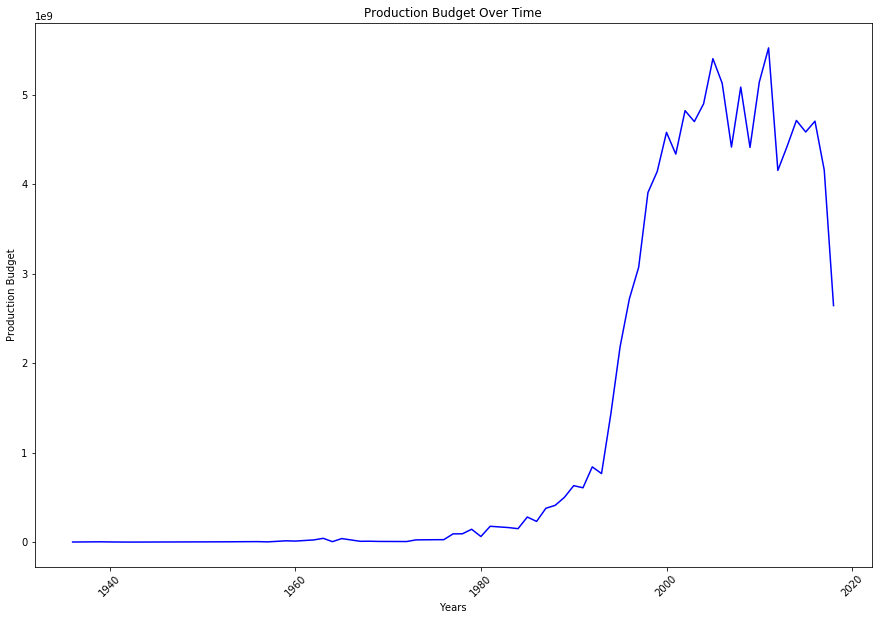

In [ ]:
# a=profit_over_time_by_year['year']
# b=profit_over_time_by_year['production_budget']
# profit_over_time_by_year.plot(a,b)
# profit_over_time_by_year.show()
#profit_over_time_by_year.plot()

x=profit_over_time_by_year['year']
y=profit_over_time_by_year['production_budget']

#print(x,y)
plt.figure(figsize=(15, 10))
#plt.bar(x, y)
plt.plot(x, y, color='blue')
plt.gca().xaxis.set_tick_params(rotation=45)
plt.xlabel('Years')
plt.ylabel('Production Budget')
plt.title("Production Budget Over Time")
plt.show()
